In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [3]:
#TO READ DATA
data=pd.read_excel("pressure_weight.xlsx")
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#OUTLIERS
z=np.abs(stats.zscore(data['X']))
print(z)

[0.90855142 0.95645395 0.09420832 1.45663625 0.49259774 1.30095302
 1.46861189 1.68097979 1.00156217 0.01357238 0.98639304 1.52849006
 0.54648809 0.16326781 0.98040522 1.4714062  1.44146712 0.74089254
 1.16922104 0.9057571  0.10019614 0.04031797 0.98639304 0.66025661
 1.77997837 0.86064888 0.84268543 0.50137987 0.35767226 0.46265865]


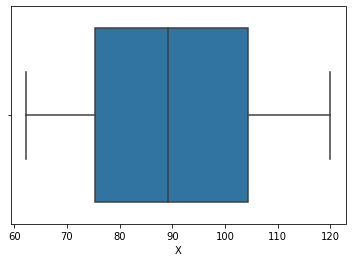

In [6]:
sns.boxplot(x=data['X'])

In [7]:
df=pd.DataFrame(data=data)
df.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [10]:
x=df
df.drop(['X'],axis=1)
for i in df:
    if i!='X':
        q=df[i].quantile(0.99)
        df[df[i]<q]
        q_low=df[i].quantile(0.01)
        q_hi=df[i].quantile(0.99)
        df_filtered=df[(df[i]<q_hi)&(df[i]>q_low)]
df_filtered.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
4,98.5,572.4
5,112.0,411.2


In [11]:
print(len(df))
print(len(df_filtered))
if(len(df)==len(df_filtered)):
    print('No outliers')
data=df_filtered

30
28


In [12]:
data_n=data.copy()
for i in data:
    if i!='X':
        data_n[i]=data[i].copy()
        data_n[i]=(data_n[i]-data_n[i].min())/(data_n[i].max()-data_n[i].min())
data_n.head()

,X,Y
0,75.1,1.000000
1,74.3,0.995198
2,88.7,0.958583
4,98.5,0.967587
5,112.0,0.000000


In [24]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [25]:
print(len(train_data))
train_data.head()

25


,X,Y
22,73.8,0.549820
21,89.6,0.609844
12,99.4,0.571429
9,90.5,0.575630
11,115.8,0.564226


In [26]:
x=np.array(train_data['X'])
y=np.array(train_data['Y'])

In [27]:
bs=2
m=1
c=-1  
l=0.1      #Learning rate
epochs=100 #Maximum iterations
ns=len(x)
nb=ns//bs
ms=ns%bs
err=[]
k=nb
if(ms>0):
    er=0
    g_m=0
    g_c=0
    for j in range(0,ms):
        er+=((y[j]-(m*x[j])-c))**2
        ind=k*bs + j
        g_m=g_m+((-1.0)*((y[ind]-m*x[ind]-c)*x[ind]))
        g_c=g_c+((-1.0)*(y[ind]-m*x[ind]-c))
    g_m=g_m/ms
    g_c=g_c/ms
  #find change in m , c
    dm=(-1.0)*l*g_m
    dc=(-1.0)*l*g_c
  #update variable 
    m=m+dm 
    c=c+dc
    er=(1/(2*len(['X'])))*(er)
    err.append(er)
else:
    for i in range(epochs):
        for k in range(nb):
            er=0
            g_m=0
            g_c=0
            for j in range(bs):
                er+=((y[j]-(m*x[j])-c))**2
                ind=k*bs + j
                g_m=g_m+((-1.0)*((y[ind]-m*x[ind]-c)*x[ind]))
                g_c=g_c+((-1.0)*(y[ind]-m*x[ind]-c))
            g_m=g_m/bs
            g_c=g_c/bs
      #find change in m,c
            dm=(-1.0)*l*g_m
            dc=(-1.0)*l*g_c
      #update variable 
            m=m+dm 
            c=c+dc
            er=(1/(2*len(train_data['X'])))*(er)
            err.append(er)
#step7 print variable x1, y1
m=round(m,2)
c=round(c,2)
print("Minimum value obtained at m = {} ,c ={} for given function ".format(m,c))

Minimum value obtained at m = -768.4 ,c =-9.67 for given function 


In [28]:
yp=[]
for i in range(len(x)):
    p=m*x[i]+c
    yp.append(p)
sum=0
for i in range(len(x)):
    sum+=(y[i]-yp[i])**2
    mse=sum/len(x)
print("Mean Square Error (MSE) : ",mse)

Mean Square Error (MSE) :  4871663844.288312


Text(0.5, 1.0, 'Predicted data vs Actual Data')

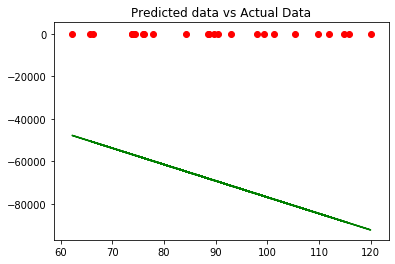

In [29]:
plt.plot(np.array(train_data['X']),np.array(yp),'green')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title("Predicted data vs Actual Data")

In [31]:
tx=np.array(test_data['X'])
ty=np.array(test_data['Y'])

yp1=[]
for i in range(len(tx)):
     p1=m*tx[i]+c
     yp1.append(p1)
sum=0
for i in range(len(tx)):
    sum+=(ty[i]-yp1[i])**2
    mse1=sum/len(tx)
print("Mean Square Error (MSE) : ",mse1)

Mean Square Error (MSE) :  4341075765.33158


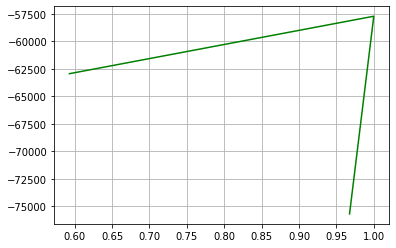

In [32]:
plt.plot(test_data['Y'],yp1,'green')
plt.grid()